# Proyecto de agrupación de clientes

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.features import PCA as yb_pca
from yellowbrick.cluster import InterclusterDistance, SilhouetteVisualizer, KElbowVisualizer

In [2]:
clientes_raw = pd.read_csv(r"..\data\raw\customer_segmentation.csv")
clientes = clientes_raw.copy()
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [3]:
clientes.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
#Validando si existen ID's repetidos
clientes[clientes.duplicated(subset='ID', keep= False)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [5]:
clientes[clientes.isna().any(axis = 1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [6]:
clientes['Income']= clientes['Income'].fillna(clientes.groupby(by=['Education'])['Income'].transform('mean'))

In [7]:
#sns.pairplot(clientes)

<Axes: >

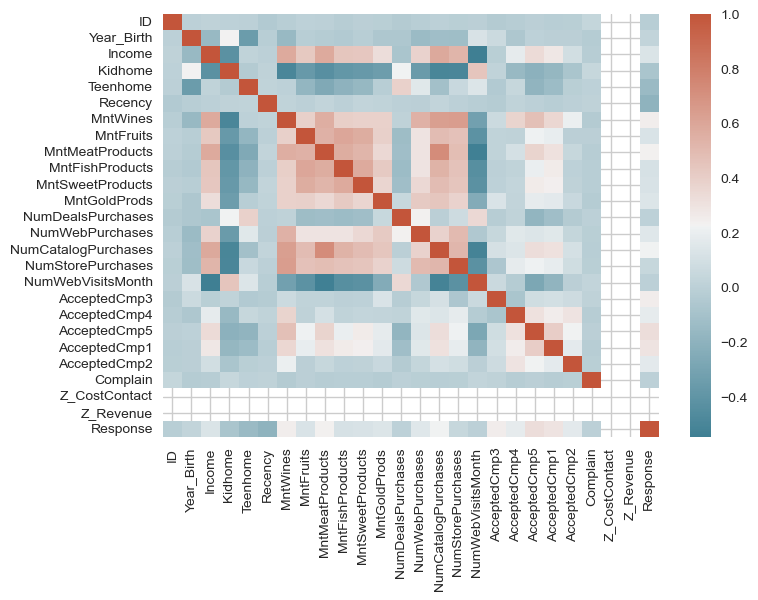

In [8]:
cpal = sns.diverging_palette(h_neg=220, h_pos=20, as_cmap=True)
sns.heatmap(clientes.select_dtypes(include=np.number).corr(), cmap= cpal)

Las columnas Z_Revenue y Z_CostContact son elementos constantes, y debido a ello no representan ninguna ingerencia o correlación con las demás variables. Por ende se eliminarán dichos campos.

In [9]:
for column in clientes.select_dtypes(exclude=np.number).columns:
    print(clientes[column].value_counts())


Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
Dt_Customer
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: count, Length: 663, dtype: int64


In [10]:
clientes['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Los valores Alone, Absurd y YOLO tienen una proporción mínima en el dataset, además de que no son significativos, por esta razón se eliminan las filas relacionadas.

In [11]:
clientes = clientes[~clientes['Marital_Status'].isin(['Alone', 'Absurd','YOLO'])]


In [12]:
clientes['Dt_Customer'] = pd.to_datetime(clientes['Dt_Customer'], format ='%d-%m-%Y')
clientes['Complain'] = clientes['Complain'].astype(str).astype('category')
clientes['Response'] = clientes['Response'].astype(str).astype('category')
clientes['Education'] = clientes['Education'].astype('category')
clientes['Marital_Status'] = clientes['Marital_Status'].astype('category')
clientes['ID'] = clientes['ID'].astype('category')

In [13]:
clientes

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [14]:
#sns.pairplot(clientes.select_dtypes(np.number))

In [15]:
clientes.describe()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue
count,2233.000000,2233.000000,2233.000000,2233.000000,2233,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,...,2233.000000,2233.00000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.0,2233.0
mean,1968.790864,52250.373901,0.444245,0.506046,2013-07-10 10:37:08.034034688,49.172414,304.033587,26.300940,167.113300,37.445141,...,2.661890,5.79176,5.316167,0.072548,0.074787,0.072548,0.064039,0.013435,3.0,11.0
min,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
25%,1959.000000,35523.000000,0.000000,0.000000,2013-01-17 00:00:00,24.000000,24.000000,1.000000,16.000000,3.000000,...,0.000000,3.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
50%,1970.000000,51650.000000,0.000000,0.000000,2013-07-09 00:00:00,50.000000,173.000000,8.000000,67.000000,12.000000,...,2.000000,5.00000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
75%,1977.000000,68316.000000,1.000000,1.000000,2013-12-30 00:00:00,74.000000,505.000000,33.000000,232.000000,50.000000,...,4.000000,8.00000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
max,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.00000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0
std,11.979248,25063.926042,0.538528,0.544675,NaN,28.962114,336.953019,39.779532,225.870588,54.461569,...,2.921749,3.25473,2.425668,0.259451,0.263107,0.259451,0.244878,0.115153,0.0,0.0


In [16]:
clientes["TotalAcceptedCmp"] = clientes["AcceptedCmp1"] + clientes["AcceptedCmp2"] + clientes["AcceptedCmp3"] + clientes["AcceptedCmp4"] + clientes["AcceptedCmp5"]
current_year = clientes['Dt_Customer'].max().year
clientes['Age']=current_year - clientes['Year_Birth']
clientes ['dias registrados'] = (clientes['Dt_Customer'].max()- clientes['Dt_Customer']).dt.days
clientes["MntTotal"] = clientes["MntFishProducts"] + clientes["MntFruits"] + clientes["MntGoldProds"] + clientes["MntMeatProducts"] + clientes["MntSweetProducts"] + clientes["MntWines"]
clientes["NumPurchases"] = clientes["NumCatalogPurchases"] + clientes["NumDealsPurchases"] + clientes["NumStorePurchases"] + clientes["NumWebPurchases"]

In [17]:
print(clientes.Z_Revenue.value_counts())
print(clientes.Z_CostContact.value_counts())
clientes = clientes.drop([], axis=1)

Z_Revenue
11    2233
Name: count, dtype: int64
Z_CostContact
3    2233
Name: count, dtype: int64


In [18]:
clientes = clientes.drop(['Dt_Customer','Year_Birth', 'Z_CostContact','Z_Revenue', "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"], axis=1)

In [19]:
clientes['Age'].sort_values(ascending=False)

239     121
339     115
192     114
1950     74
424      73
       ... 
1850     19
995      19
747      19
1170     18
46       18
Name: Age, Length: 2233, dtype: int64

In [20]:
clientes = clientes[clientes['Age'] < 114]

In [21]:
clientes['Income'].sort_values()

1245      1730.0
21        2447.0
1524      3502.0
1846      4023.0
1975      4428.0
          ...   
164     157243.0
1300    157733.0
687     160803.0
617     162397.0
2233    666666.0
Name: Income, Length: 2230, dtype: float64

In [22]:
clientes=clientes[clientes['Income'] < 600000]

In [23]:
#sns.pairplot(clientes.select_dtypes(np.number))

In [24]:
clientes=clientes.set_index('ID')
col_nocod=['Complain','Response']
col_cat=clientes.drop(col_nocod,axis=1).select_dtypes(exclude=np.number).columns
col_num=clientes.select_dtypes(include=np.number).columns

In [25]:
codificador=OneHotEncoder()
columnas_codificadas=codificador.fit_transform(clientes[col_cat]).toarray()
clientes_codificado=pd.DataFrame(columnas_codificadas, index=clientes.index, columns=codificador.get_feature_names_out(col_cat))

In [26]:
clientes.select_dtypes(include=np.number).columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'TotalAcceptedCmp', 'Age', 'dias registrados', 'MntTotal',
       'NumPurchases'],
      dtype='object')

In [27]:
escalador=StandardScaler()
columnas_estandarizadas=escalador.fit_transform(clientes[col_num])
clientes_estandarizados= pd.DataFrame(columnas_estandarizadas, index=clientes.index, columns=col_num)
clientes_procesado = pd.concat([clientes_estandarizados,clientes_codificado,clientes[col_nocod].astype(float)], axis=1)

c:\Users\JoseHerrera\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\JoseHerrera\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Número de componentes'),
 Text(0, 0.5, 'Varianza explicada acumulada')]

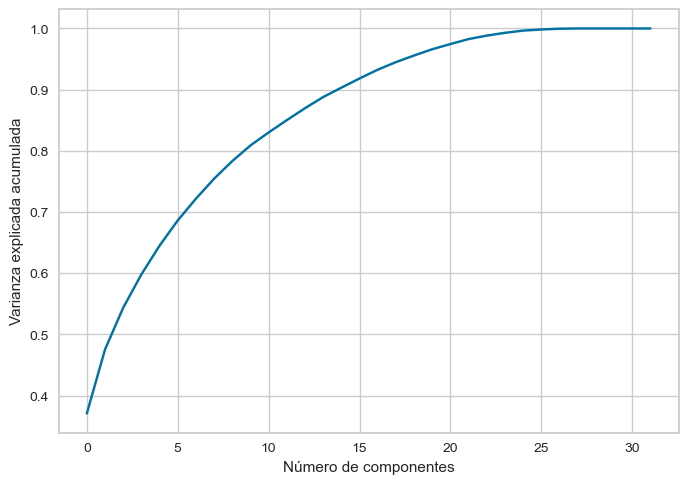

In [28]:
pca = PCA(random_state=100)
pca.fit(clientes_procesado)
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)
sns.lineplot(varianza_acumulada).set(xlabel='Número de componentes', ylabel='Varianza explicada acumulada')

In [29]:
varianza_acumulada

array([0.37069883, 0.47532398, 0.54351727, 0.59801937, 0.64499113,
       0.68622113, 0.72178114, 0.75443895, 0.78327473, 0.80881723,
       0.83005404, 0.85015585, 0.86968781, 0.88793839, 0.90327015,
       0.9182921 , 0.93265077, 0.94500326, 0.95584587, 0.96610254,
       0.97458272, 0.98269995, 0.98834105, 0.99289171, 0.99652016,
       0.99836424, 0.9995911 , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

c:\Users\JoseHerrera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\JoseHerrera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\JoseHerrera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\JoseHerrera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\JoseHerrera\anaconda3\L

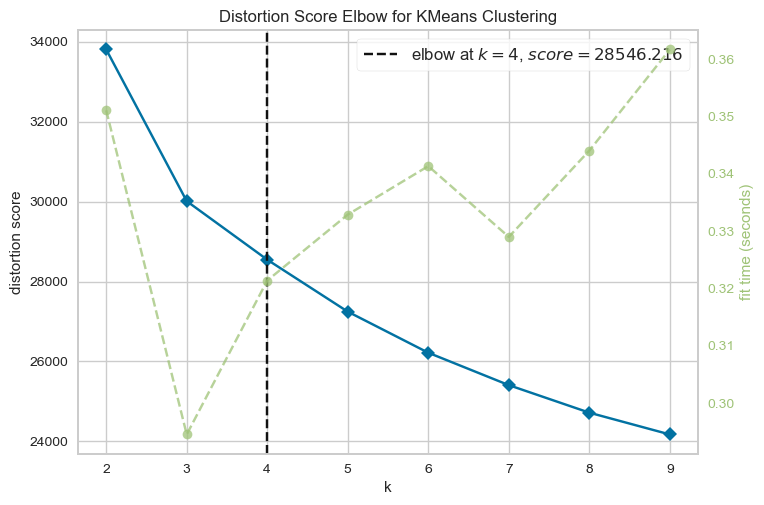

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
Elbow_M = KElbowVisualizer(KMeans(random_state=100), k=(2, 10))
Elbow_M.fit(clientes_procesado)
Elbow_M.show()

c:\Users\JoseHerrera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


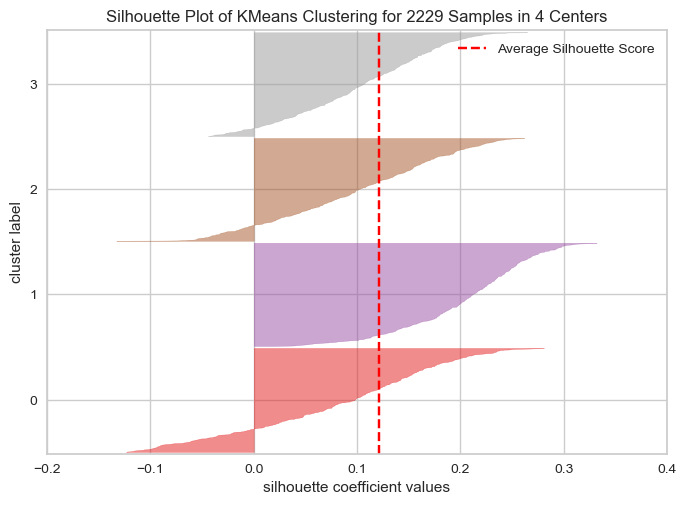

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2229 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
Sil_M = SilhouetteVisualizer(KMeans(4, random_state=100))
Sil_M.fit(clientes_procesado)
Sil_M.show()

c:\Users\JoseHerrera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


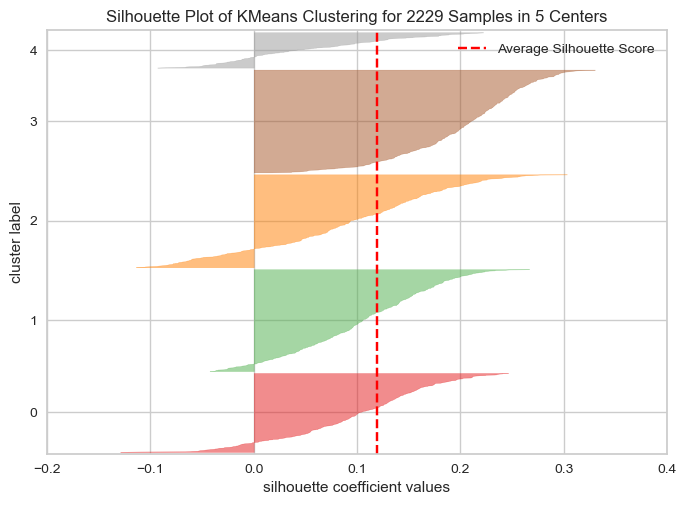

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2229 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [32]:
Sil_M = SilhouetteVisualizer(KMeans(5, random_state=100))
Sil_M.fit(clientes_procesado)
Sil_M.show()

c:\Users\JoseHerrera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\JoseHerrera\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


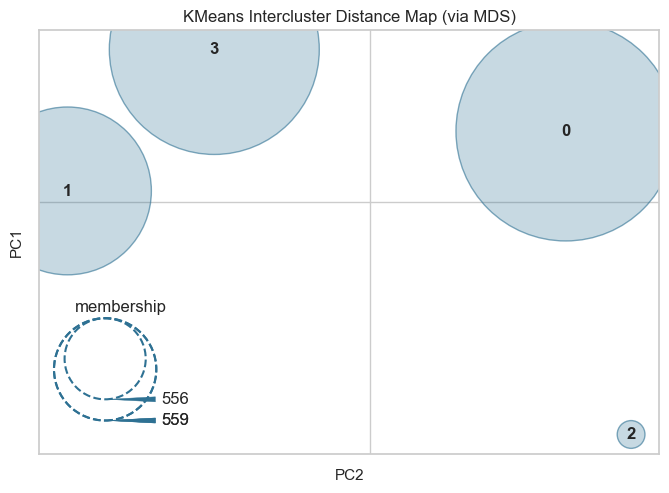

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [33]:
Inter_M = InterclusterDistance(KMeans(4, random_state=100))
Inter_M.fit(clientes_procesado)
Inter_M.show()

c:\Users\JoseHerrera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\JoseHerrera\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


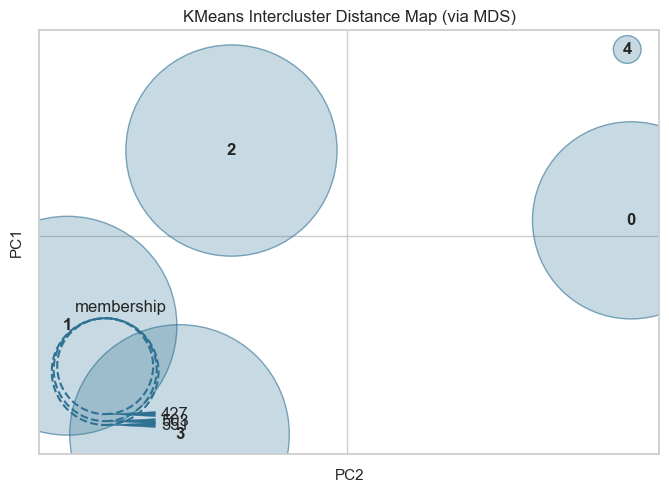

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [34]:
Inter_M = InterclusterDistance(KMeans(5, random_state=100))
Inter_M.fit(clientes_procesado)
Inter_M.show()

In [35]:
KM = KMeans(n_clusters=4, random_state=100)
# Entrenar el modelo y predecir los clusters
yhat_KM = KM.fit_predict(clientes_procesado)
#Añadir el atributo de clusters al dataset original
clientes_procesado["cluster"] = yhat_KM
clientes["cluster"] = yhat_KM

c:\Users\JoseHerrera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


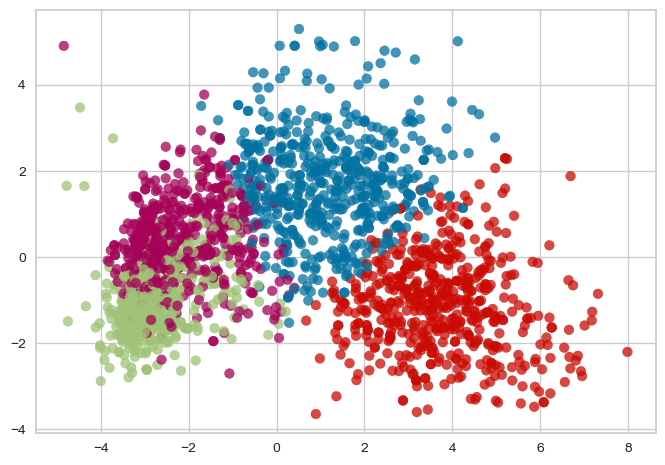

In [36]:
pca_viz = yb_pca(scale=True, projection=2, random_state=100).fit_transform(clientes_procesado.drop("cluster", axis=1), clientes_procesado["cluster"])




,PC1,PC2
MntTotal,0.335581,-0.018708
Income,0.298493,0.000031
NumPurchases,0.296203,0.272531
NumCatalogPurchases,0.291136,-0.017730
MntWines,0.284705,0.133836
MntMeatProducts,0.280104,-0.158952
NumStorePurchases,0.268367,0.128648
MntFishProducts,0.243784,-0.176705
MntSweetProducts,0.236536,-0.149447
MntFruits,0.235378,-0.166220


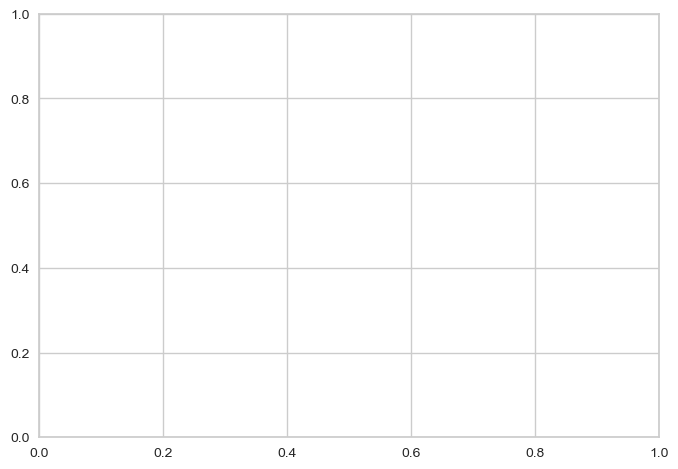

In [37]:
pca_components = yb_pca(scale=True, projection=2, random_state=100).fit(clientes_procesado.drop("cluster", axis=1), clientes_procesado["cluster"]).pca_components_
pca_detail = pd.DataFrame(pca_components, columns=clientes_procesado.drop("cluster", axis=1).columns, index=["PC1","PC2"]).T
pca_detail.sort_values("PC1", key=abs, ascending=False)

In [38]:
pca_detail.sort_values("PC2", key=abs, ascending=False)

,PC1,PC2
NumDealsPurchases,-0.018233,0.458812
Teenhome,-0.030089,0.451317
NumWebPurchases,0.211111,0.302345
NumPurchases,0.296203,0.272531
Age,0.059599,0.271179
NumWebVisitsMonth,-0.208107,0.251964
dias registrados,0.046063,0.185067
Education_PhD,0.013225,0.183977
MntFishProducts,0.243784,-0.176705
MntFruits,0.235378,-0.166220


[Text(0, 0, '560'), Text(0, 0, '556'), Text(0, 0, '554'), Text(0, 0, '559')]

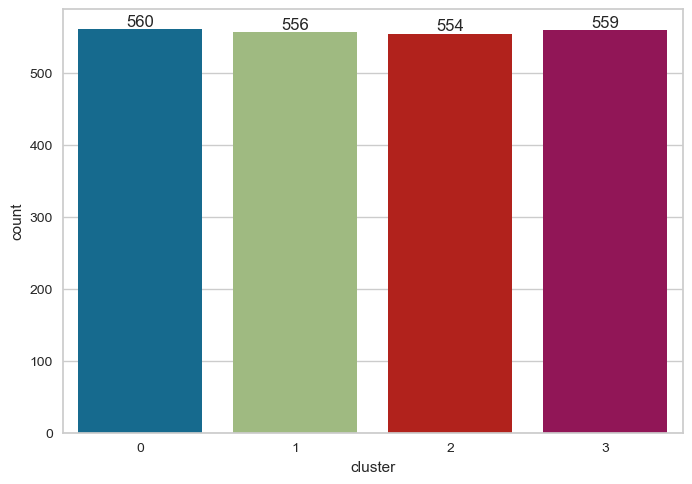

In [39]:
ax = sns.countplot(x=clientes_procesado["cluster"])
ax.bar_label(ax.containers[0])

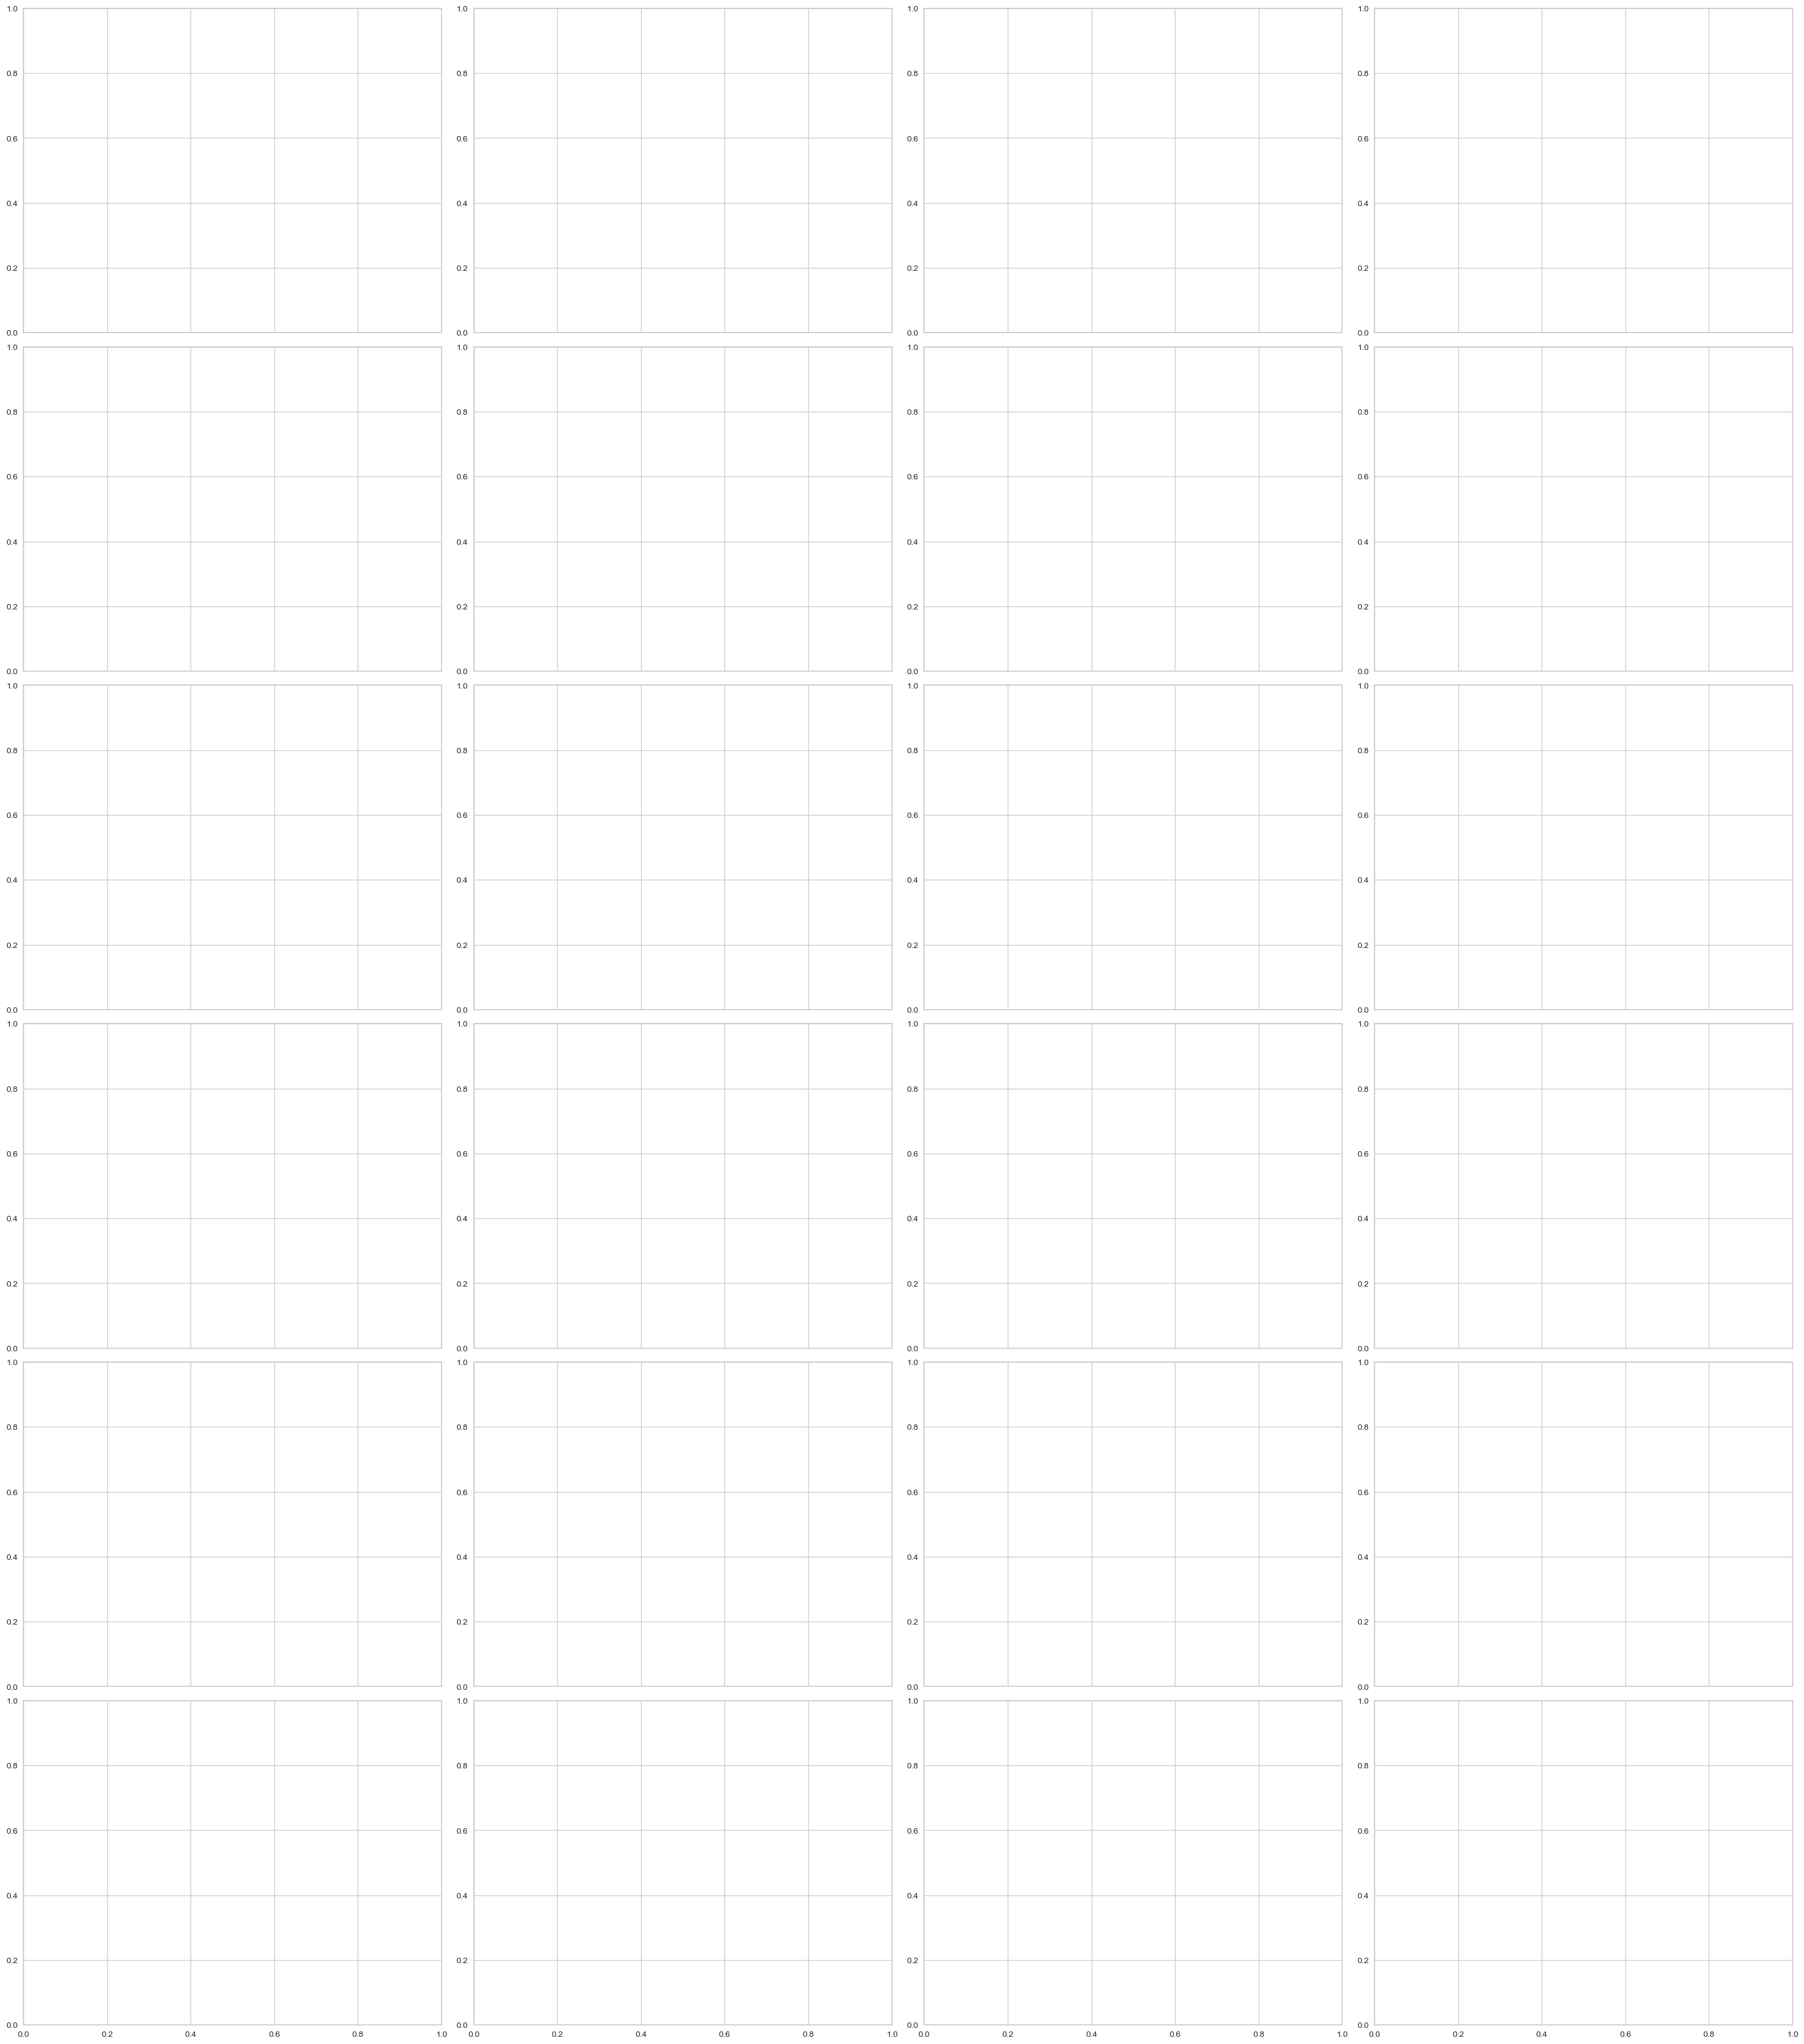

In [49]:
fig, axes = plt.subplots(nrows=6,ncols=4, constrained_layout=True, figsize=(30, 34), sharex=True)

In [52]:
for i, col in enumerate(clientes.columns[:-1]):
    nrow = i//4
    ncol = i%4
    if col in col_num:
        sns.boxplot(data=clientes, x="cluster", y=col, ax=axes[nrow,ncol])
    else:
        sns.countplot(data=clientes, x='cluster', hue=col, ax=axes[nrow,ncol])
        


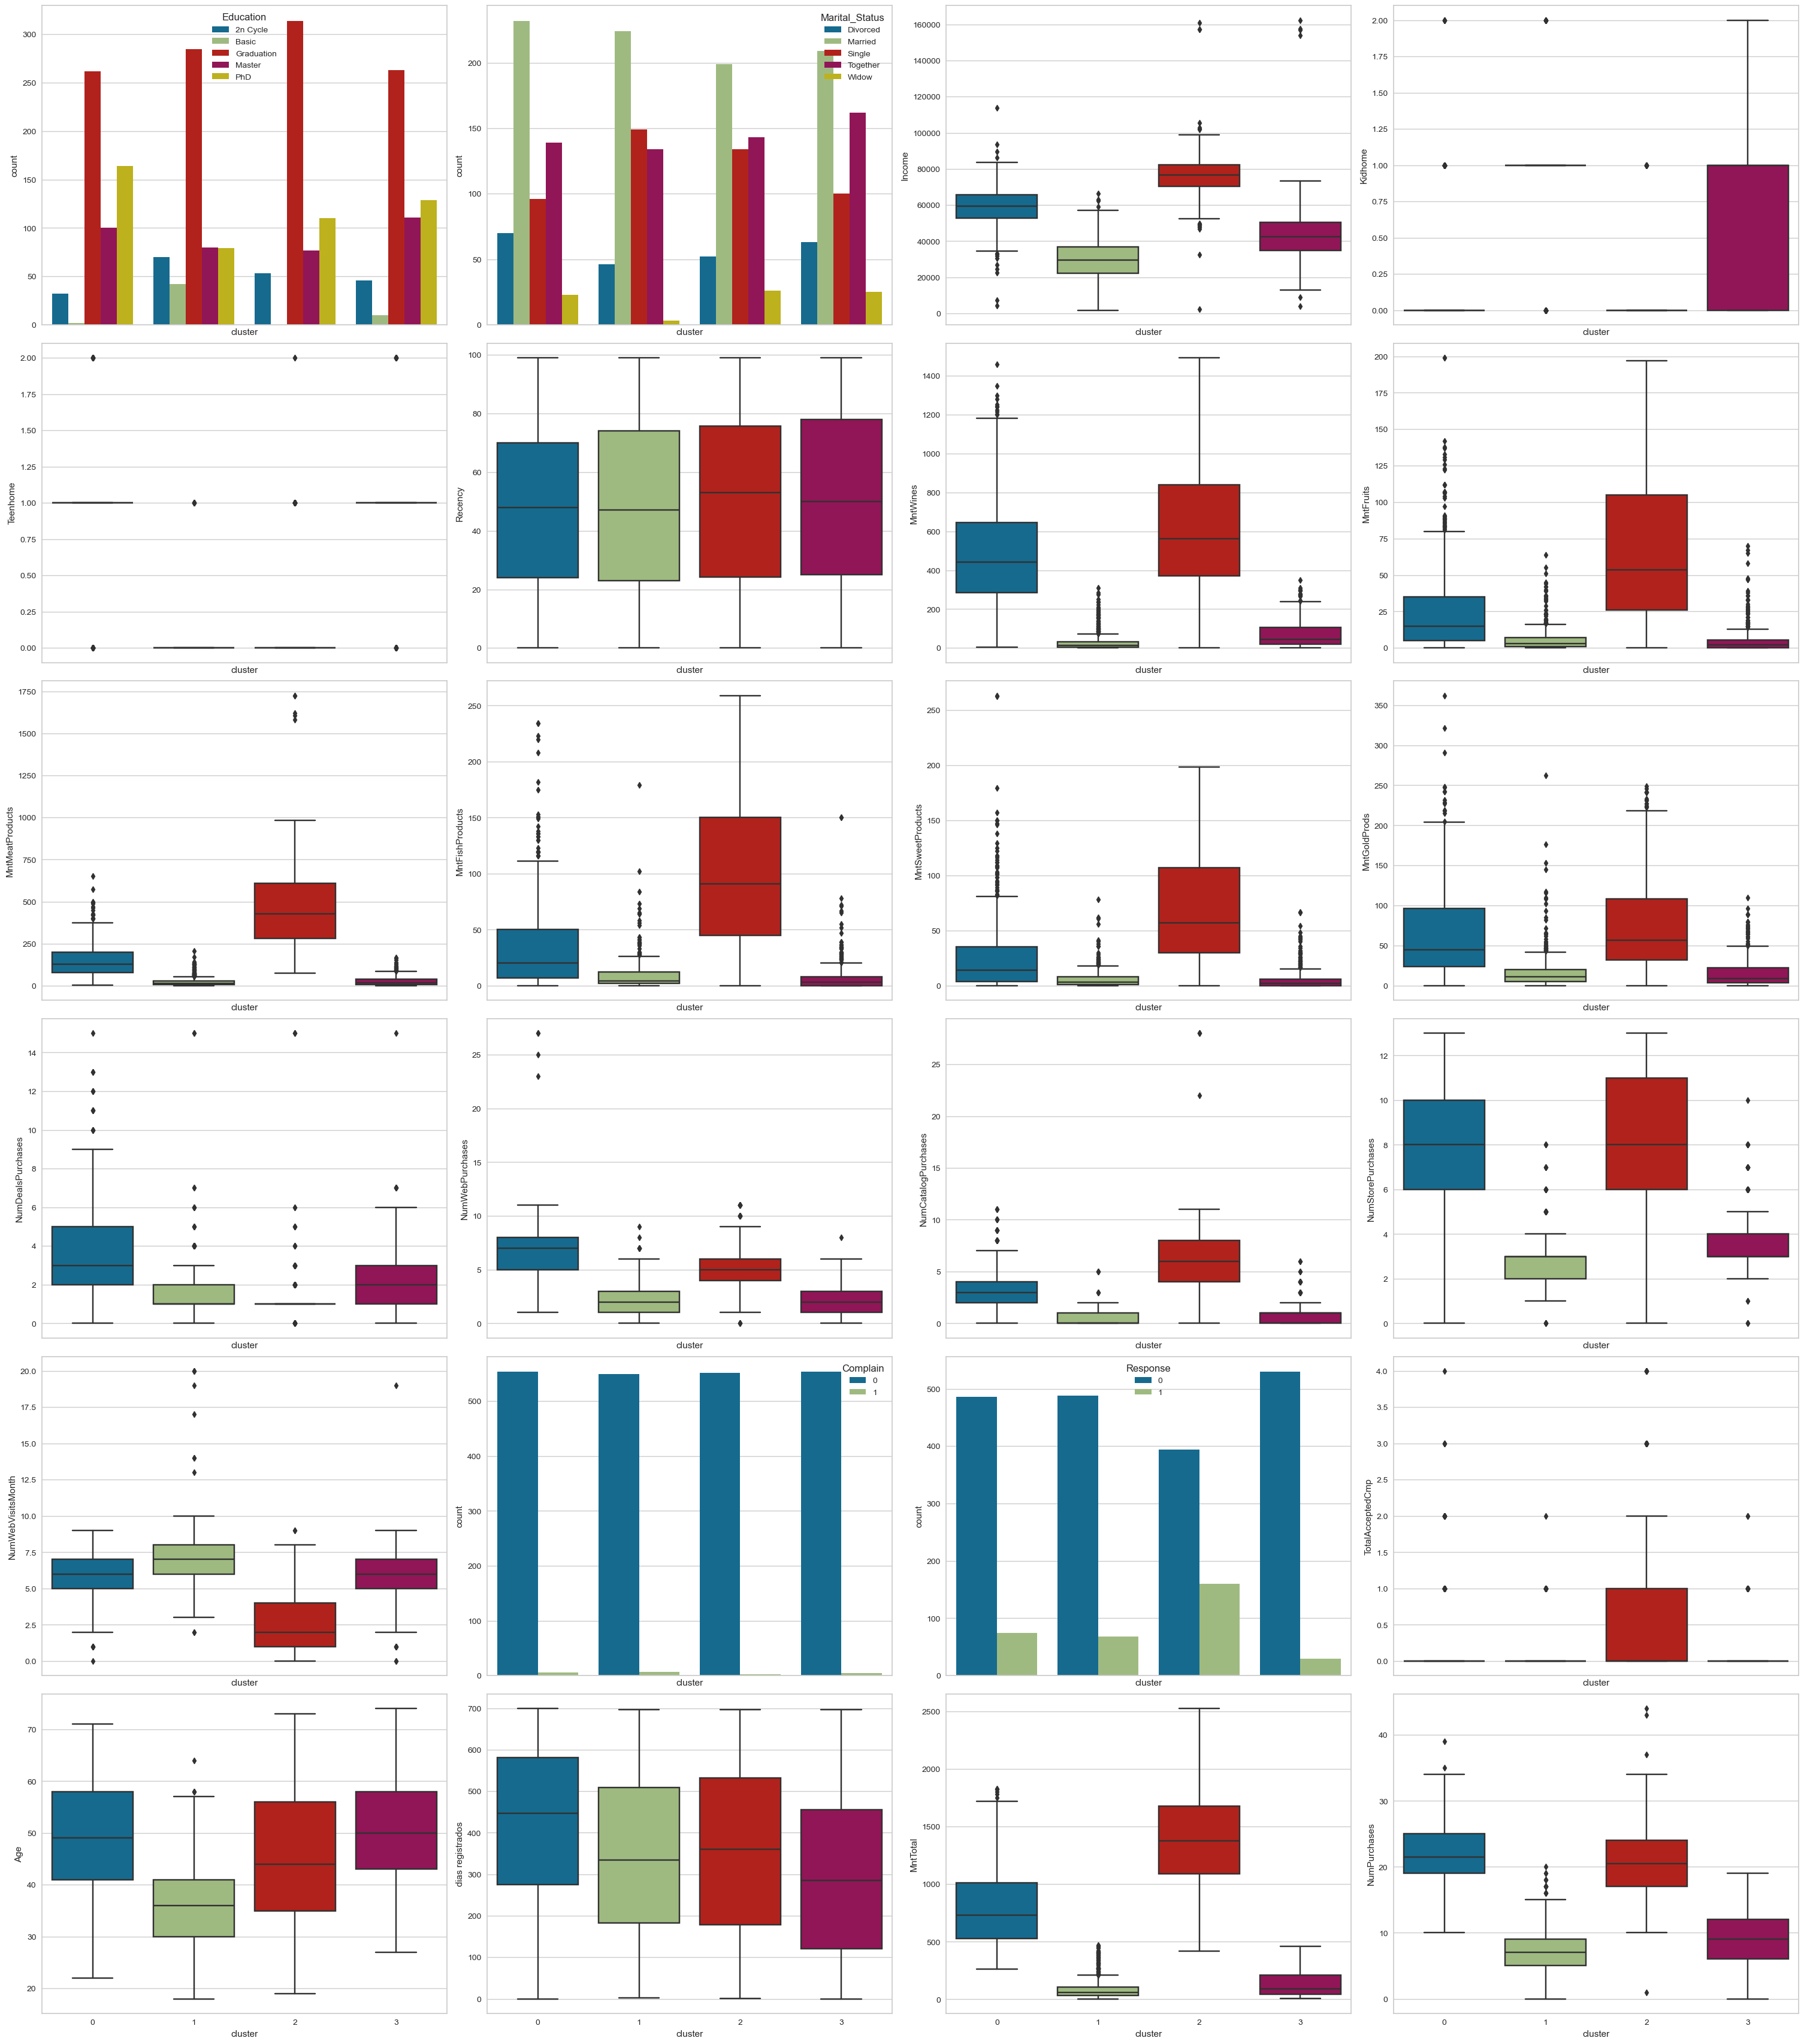

In [54]:
fig